# Ultimate_Challenge

Ultimate Technologies Inc. is a hypothetical American worldwide online transportation network company headquartered in San Francisco, California. Founded by Jarvis Karolick in 2010, it has completely disrupted the taxi and logistics industry, and is one of the most prestigious companies to work for.

## Exploratory Data Analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. We will aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. We will report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, we will report these as well.

In [1]:
# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
# Convert json file into dataframe
df = pd.read_json('logins.json')

In [3]:
# Show first five rows
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
# Display info including column type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
# Convert login time to standard units
df['month'] = df['login_time'].dt.month
df['year'] = df['login_time'].dt.year
df['hour'] = df['login_time'].dt.hour
df['minute'] = df['login_time'].dt.minute
df['second'] = df['login_time'].dt.second
df['dayofweek'] = df['login_time'].dt.dayofweek

In [6]:
# Display standard stats of new columns
df.describe()

,month,year,hour,minute,second,dayofweek
count,93142.000000,93142.0,93142.000000,93142.000000,93142.000000,93142.000000
mean,2.424062,1970.0,11.635363,29.801711,29.619033,3.570301
std,0.995154,0.0,7.816792,17.245034,17.319278,1.946072
min,1.000000,1970.0,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1970.0,4.000000,15.000000,15.000000,2.000000
50%,3.000000,1970.0,12.000000,30.000000,30.000000,4.000000
75%,3.000000,1970.0,19.000000,45.000000,45.000000,5.000000
max,4.000000,1970.0,23.000000,59.000000,59.000000,6.000000


In [7]:
# Create column of 15_min_intervals
df['15_min_intervals'] = 4 * df['hour'] + (df['minute']/15).astype(int)

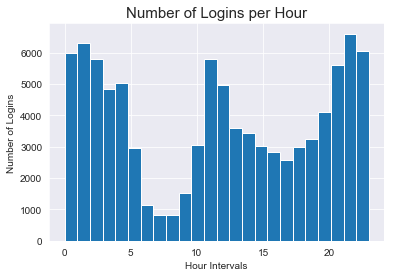

In [8]:
# Set Seaborne style
sns.set_style("darkgrid")

# Create histogram of 15_min_intervals
plt.hist(df['hour'], bins=24, ec='white')
plt.xlabel('Hour Intervals')
plt.ylabel('Number of Logins')
plt.title('Number of Logins per Hour', fontsize=15)
plt.show()

The logins peak at night, between 10pm and 3am. There is also a clear low period between 6 and 9am. Perhaps the data is presented as East Coast Time, but is really West Coast time. Then the peak hours would be between 7pm and midnight, and the low hours between 3am and 6am. This makes more sense.

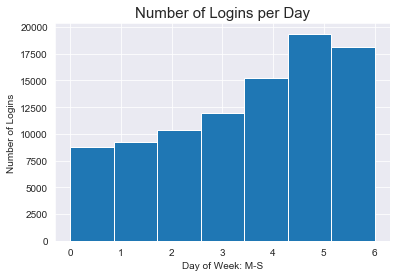

In [9]:
# Create histogram of 1 week intervals
plt.hist(df['dayofweek'], bins=7, ec='white')
plt.xlabel('Day of Week: M-S')
plt.ylabel('Number of Logins')
plt.title('Number of Logins per Day', fontsize=15)
plt.show()

The number of logins per day continiously increase from Monday until Saturday. Peak days are Saturday, Sunday and Friday.

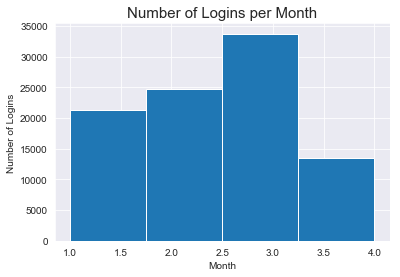

In [10]:
# Create histogram of 1 week intervals
plt.hist(df['month'], bins=4, ec='white')
plt.xlabel('Month')
plt.ylabel('Number of Logins')
plt.title('Number of Logins per Month', fontsize=15)
plt.show()

The number of logins increased per month. The last month is lower because the whole month is not represented.

## Experiment and Metrics Design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1) What should be chosen as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why?

Mean Monthly Profits Per Driver is an optimal metric to determine if reimbursing drivers on toll costs is effective. This metric is essential because it will reveal if the company gains profits via the toll reimbursements. 

The profit metric should be coupled with a "2-city drive" metric, summing the number of rides that started in either Gotham or Metropolis, and ended in the other city.

2) A practical experiment comparing the effectiveness of the proposed change in relation to the key measure of success can use the following guidelines:

A. implementation of the experiment

 - DATA ANALYSIS - Profits should be carefully analyzed over 30-day periods in order to make effective predictions and ensure that confounding variables like weather, holiday seasons, etc. are taken into account.

 - TECHNOLOGY - Ensure that all vehicles have a way of recording bridge crosses per ride that can be stored in an accessible table.

 - CONSISTENCY - Ensure that no other signfinicant changes will be made during the 30-day time period.

 - SPLIT - Randomly select 5% of active drivers into a test group, and 5% of active drivers into a control group. Each split should be represenative of the active driver population. If either group is unrepresentative, a new split should be generated.
 
 - CONFIDENCE INTERVAL - Since the change is significant, a confidence interval of 96% is recommended.
 
 - COMMUNICATION - The drivers will be contacted 1 week in advance allowing time to reach all drivers and answer any questions.

B. statistical test(s) to verify the significance of the observation

 - t-TEST - Monthly Profits Per Driver is a mean calculation. The data are randomly sampled, there are more than 10X active drivers per sample, and the sample size will be greater than 30 due to the large size of the company. Thus a t-test is warranted.

 - HYPOTHESES - The Null Hypothesis is that the mean profit is the same for both groups. The Altnernative Hypothesis is that the mean profit is greater for the test group.
 
- p-VALUE - After the experiment completes, the Mean Monthly Profits Per Driver for each group can be calculated. The test group will receive a p-value based on its t-score. If the p-value is less than 0.02, the Null Hypothesis is incorrect.


C. Interpreting the results and providing recommendations to the city operations team along with any caveats.

 - MORE PROFITS - If the Null Hypothesis is incorrect, we are 96% confident that the increase in profits in the test group was not due to chance. We thus recommend implenting toll bridge reiumbursement company-wide. There is a 4% probability that our results are due to chance and we have made a Type II Error.

- NO CHANGE - If the Null Hypothesis is correct, no changes will be recommended at this time. Further analysis, however, may be warranted if the results are compelling. For instance, a partial toll reimbursement could show a greater increase in profits. Drivers may also be interviewed to gain further insight. 

## Predictive Modeling

Ultimate is interested in predicting rider retention. A sample dataset of a cohort of users who signed up for an Ultimate account in January 2014 is provided. The data was pulled several months later; a user is considered retained if they were “active” (i.e. took a trip) in the preceding 30 days. 

Let us determine what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. The data is in the attached file ultimate_data_challenge.json.

### Examine Data

In [11]:
# Import libraries
import pandas as pd
import json

# Open file
with open('ultimate_data_challenge.json') as f:
   data = json.load(f)

# Create dataframe
dfu = pd.DataFrame(data)

In [12]:
# Show first five entries
dfu.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [13]:
# Show info
dfu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [14]:
# Convert date strings into date-time objects
dfu['last_trip_date'] = pd.to_datetime(dfu['last_trip_date'], errors='ignore')
dfu['signup_date'] = pd.to_datetime(dfu['signup_date'], errors='ignore')

In [15]:
# Verify conversions
dfu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


Ave_rating_by_driver, avg_rating_of_driver and phone are the columns with null values. The mean can be used for the first two.

In [16]:
dfu['avg_rating_by_driver'].fillna((dfu['avg_rating_by_driver'].mean()), inplace=True)
dfu['avg_rating_of_driver'].fillna((dfu['avg_rating_of_driver'].mean()), inplace=True)

In [17]:
dfu['phone'].value_counts(normalize=True)

iPhone     0.697162
Android    0.302838
Name: phone, dtype: float64

In [18]:
dfu.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.445753,0.564977,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.700000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [19]:
# Create dataframe of null phone values
df_no_phone = dfu[(dfu['phone']!='iPhone') & (dfu['phone']!='Android')]

# Show first five rows
df_no_phone.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
134,2.88,5.0,5.0,1.00,King's Landing,2014-06-11,None,2014-01-10,0.0,0,False,100.0
176,20.32,5.0,5.0,1.00,Astapor,2014-03-18,None,2014-01-28,0.0,0,False,100.0
320,31.01,5.0,5.0,1.00,Astapor,2014-01-09,None,2014-01-08,0.0,1,False,100.0
349,6.03,5.0,3.3,1.00,Winterfell,2014-06-22,None,2014-01-06,0.0,1,True,33.3
389,3.08,4.8,4.9,1.02,King's Landing,2014-07-01,None,2014-01-26,3.0,5,False,66.7


The none listing is unclear. It could mean that no data was collected, but it could also mean that they don't have an iPhone or Android.

In [20]:
# Transform null phone column into "Unknown" string
dfu['phone'] = dfu.phone.apply(lambda x: x if not pd.isnull(x) else 'Unknown')

In [21]:
# Calculate day of year to find out who took trips in last 30 days
dfu['dayofyear'] = dfu['last_trip_date'].dt.dayofyear

In [22]:
# Write function to determine if user was retained
def user_retained(row):
    if row['dayofyear'] >= 152:
        return 1
    else:
        return 0

# Apply function to new column user_retained    
dfu['user_retained'] = dfu.apply(user_retained, axis=1)

In [23]:
# Show first five rows
dfu.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,dayofyear,user_retained
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,168,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,125,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,7,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,180,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,74,0


In [24]:
# Convert string columns into numeric columns
import sklearn
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for x in dfu.columns:
    if dfu[x].dtypes=='object':
       dfu[x]=le.fit_transform(dfu[x])

In [25]:
# Show correlation matrix between columns and user_retained
corr_matrix = dfu.corr()
corr_matrix['user_retained'].sort_values(ascending=False)

user_retained             1.000000
dayofyear                 0.780837
phone                     0.226405
trips_in_first_30_days    0.210463
ultimate_black_user       0.205002
city                      0.066755
surge_pct                 0.011797
weekday_pct               0.009693
avg_surge                -0.003333
avg_rating_of_driver     -0.010829
avg_rating_by_driver     -0.026748
avg_dist                 -0.092780
Name: user_retained, dtype: float64

There is a clear positive correlation with users being retained and 3 distinct categories: phones, trips_in_first_30_days and ultimate_black_users. 

There is also a negative correlation between avg_dist and user_retained.

(Note that user_retained depends on dayofyear so the dayofyear correlation should be discarded.)

To investigate the phone correlation, let's create two histograms, one of users_retained, and one of users not retained.

In [26]:
# Split data frame into user_retained and user_not_retained dataframes
dfu_user_retained = dfu[dfu['user_retained']==1]
dfu_user_not_retained = dfu[dfu['user_retained']==0]

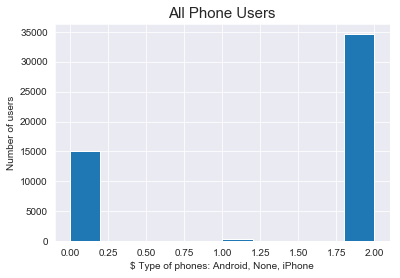

In [27]:
# Setup Seaborn
import seaborn as sns
sns.set_style("darkgrid")

# Create histogram showing number of users
plt.hist(dfu.phone, ec='white')

# Create labels
plt.xlabel('$ Type of phones: Android, None, iPhone')
plt.ylabel('Number of users')
plt.title('All Phone Users', fontsize=15)

# Show graph
plt.show()

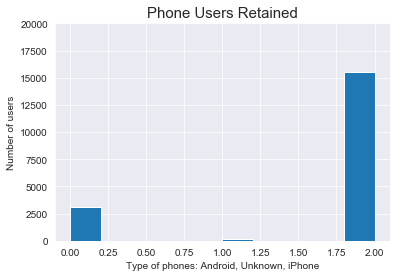

In [28]:
# Create histogram showing number of users
plt.hist(dfu_user_retained.phone, ec='white')

# Create labels
plt.xlabel('Type of phones: Android, Unknown, iPhone')
plt.ylabel('Number of users')
plt.title('Phone Users Retained', fontsize=15)
plt.ylim(0,20000)

# Show graph
plt.show()

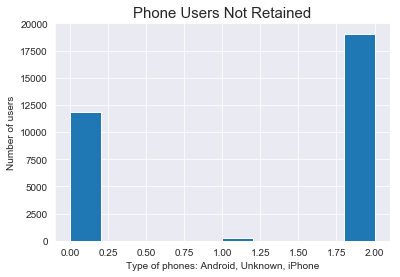

In [29]:
# Create histogram showing number of users
plt.hist(dfu_user_not_retained.phone, ec='white')

# Create labels
plt.xlabel('Type of phones: Android, Unknown, iPhone')
plt.ylabel('Number of users')
plt.title('Phone Users Not Retained', fontsize=15)
plt.ylim(0,20000)


# Show graph
plt.show()

There is a clear negative correlation between Android users and users retained. The same holds for the unknown column. 

### Machine Learning

With the dataset explored, we will now run Machine Learning tests to determine the best predictors.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [31]:
dfu.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,dayofyear,user_retained
0,3.67,5.0,4.7,1.10,1,2014-06-17,2,2014-01-25,15.4,4,True,46.2,168,1
1,8.26,5.0,5.0,1.00,0,2014-05-05,0,2014-01-29,0.0,0,False,50.0,125,0
2,0.77,5.0,4.3,1.00,0,2014-01-07,2,2014-01-06,0.0,3,False,100.0,7,0
3,2.36,4.9,4.6,1.14,1,2014-06-29,2,2014-01-10,20.0,9,True,80.0,180,1
4,3.13,4.9,4.4,1.19,2,2014-03-15,0,2014-01-27,11.8,14,False,82.4,74,0


In [32]:
# Choose relevant predictor columns
X = dfu[['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge', 'city', 'phone', 'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct']]

In [33]:
X.shape[1]

9

In [34]:
# Store list of X.columns to determine most important factors later
col_list = X.columns

In [35]:
# Scale columns to values between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [36]:
# Choose target column
y = dfu['user_retained']

In [37]:
# Create function to return the results of machine learning tests
def ml_classification_tests(X, y, num_cols=X.shape[1]):
    
    # Split into training and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    #------------------------------------------------------------------------
    
    # NAIVE BAYES
    print('Naive Bayes')
    
    #the grid of parameters to search over
    alphas = [0.001, 0.01, .1, 1, 5]
    
    param_grid = {'alpha': alphas}
    
    # Create a multinomial classifier
    mnb = MultinomialNB()
    
    mnb_cv = GridSearchCV(mnb, param_grid, cv=5)
    
    # Fit the classifier to the data
    mnb_cv.fit(X_train, y_train)
    
    # Print the tuned parameters and score
    print("Best Naive Bayes alpha: {}".format(mnb_cv.best_params_)) 
    print("Best Naive Bayes score: {}".format(mnb_cv.best_score_))
    
    # Predict the labels of the test set: y_pred
    y_pred = mnb_cv.predict(X_test)

    # Compute and print the confusion matrix and classification report
    print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
    print('Classification Report:', classification_report(y_test, y_pred))
    
    #------------------------------------------------------------------------

    
    # LOGISTIC REGRESSION
    print('\nLogistic Regression')
    
    # Setup the hyperparameter grid
    c_space = np.logspace(-5, 8, 10)
    param_grid = {'C': c_space}

    # Instantiate a logistic regression classifier: logreg
    logreg = LogisticRegression()

    # Instantiate the GridSearchCV object: logreg_cv
    logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

    # Fit it to the data
    logreg_cv.fit(X_train,y_train)

    # Print the tuned parameters and score
    print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
    print("Best Logistic Regression score: {}".format(logreg_cv.best_score_))
    
        # Predict the labels of the test set: y_pred
    y_pred = logreg_cv.predict(X_test)

    # Compute and print the confusion matrix and classification report
    print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
    print('Classification Report:', classification_report(y_test, y_pred))
    
    #------------------------------------------------------------------------
    
    # DECISION TREE TUNED
    print('\nDecision Tree')
    
    # Instantiate a Decision Tree classifier
    tree = DecisionTreeClassifier()
        
    if num_cols == 1:
        # Setup the parameters and distributions to sample from: param_dist
        param_dist = {"max_depth": [3, None],
              "criterion": ["gini", "entropy"]}

        # Instantiate RandomizedSearchCV
        tree_cv = GridSearchCV(tree, param_dist, cv=5)
    
    else:
        # Setup the parameters and distributions to sample from: param_dist
        param_dist = {"max_depth": [3, None],
                  "max_features": randint(1, num_cols),
                  "min_samples_leaf": randint(1, num_cols),
                  "criterion": ["gini", "entropy"]}

        # Instantiate RandomizedSearchCV
        tree_cv = RandomizedSearchCV(tree, param_dist, n_iter = 20, cv=5)

    # Fit it to the data
    tree_cv.fit(X,y)

    # Print the tuned parameters and score
    print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
    print("Best Tuned Decision Tree score: {}".format(tree_cv.best_score_))
    
    # Predict the labels of the test set: y_pred
    y_pred = tree_cv.predict(X_test)

    # Compute and print the confusion matrix and classification report
    print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
    print('Classification Report:', classification_report(y_test, y_pred))
    
    #------------------------------------------------------------------------
    
    # RANDOM FORESTS
    print('\nRandom Forests')
    
    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]
    # Method of selecting samples for training each tree
    bootstrap = [True, False]
    # Create the random grid
    random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}    
    
    # Instantiate a Random Forest Classifier
    rfc = RandomForestClassifier(n_estimators=200)
    
    # Instantiate RandomizedSearchCV
    rf_cv = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, cv = 5, n_jobs = -1)
    
    # Fit the random search model
    rf_cv.fit(X_train, y_train)
    
    # Print the tuned parameters and score
    print("Tuned Random Forest Parameters: {}".format(rf_cv.best_params_))
    print("Best Random Forest score: {}".format(rf_cv.best_score_))
    
    # Predict the labels of the test set: y_pred
    y_pred = rf_cv.predict(X_test)

    # Compute and print the confusion matrix and classification report
    print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
    print('Classification Report:', classification_report(y_test, y_pred))
    
    #------------------------------------------------------------------------

In [38]:
ml_classification_tests(X,y)

Naive Bayes
Best Naive Bayes alpha: {'alpha': 0.001}
Best Naive Bayes score: 0.6241333333333333
Confusion Matrix: [[7800    1]
 [4697    2]]
Classification Report:              precision    recall  f1-score   support

          0       0.62      1.00      0.77      7801
          1       0.67      0.00      0.00      4699

avg / total       0.64      0.62      0.48     12500


Logistic Regression
Tuned Logistic Regression Parameters: {'C': 166.81005372000593}
Best Logistic Regression score: 0.6973066666666666
Confusion Matrix: [[6688 1113]
 [2801 1898]]
Classification Report:              precision    recall  f1-score   support

          0       0.70      0.86      0.77      7801
          1       0.63      0.40      0.49      4699

avg / total       0.68      0.69      0.67     12500


Decision Tree
Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 7}
Best Tuned Decision Tree score: 0.74468
Confusion Matrix: [[6892  909]
 

The best results are obtained by a Decision Tree with the specified criteria.

### Feature Importance

Feature importance of machine learning models is one way to determine which factors are the most important in predicting rider retention. We will implement feature_importance with a baseline xgboost model.

In [39]:
# Import xgboost
import xgboost as xgb

# Create the training and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)

# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=200)

# Fit the classifier to the training set
xg_cl.fit(X_train,y_train)

# Predict the labels of the test set: preds
preds = xg_cl.predict(X_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

# Display feature_importances_
print(col_list)
print(xg_cl.feature_importances_)

accuracy: 0.789600
Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'phone', 'trips_in_first_30_days', 'ultimate_black_user',
       'weekday_pct'],
      dtype='object')
[0.17082112 0.08284458 0.07624634 0.10190616 0.1202346  0.04252199
 0.1686217  0.04105572 0.19574781]


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


The booster suggests that weekday_pct, followed by trips_in_first_30_days and avg_dist are the factors most likely to determine rider retention. This is a bit of surprise when comparing the correlations, however, the model is not linear, so correlation coefficients do not carry as much weight.

In [40]:
# Import RFE
from sklearn.feature_selection import RFE

# Instantiate Best Decision Tree classifier
tree = DecisionTreeClassifier(criterion='gini', max_depth=None, max_features=1, min_samples_leaf=8)
       
# Fit it to the data
tree.fit(X_train,y_train)

print(col_list)

# Set up the i
for i in range(1,len(col_list)+1):
    
    # Use recur
    rfe = RFE(tree, i)
    rfe = rfe.fit(X_train, y_train)

    # print summaries for the selection of attributes
    print(rfe.ranking_)

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'phone', 'trips_in_first_30_days', 'ultimate_black_user',
       'weekday_pct'],
      dtype='object')
[2 1 9 7 4 6 5 8 3]
[2 1 7 4 3 6 5 8 1]
[1 3 7 2 1 4 6 5 1]
[1 1 6 3 1 5 2 4 1]
[1 1 4 1 1 3 2 5 1]
[1 1 4 1 1 2 3 1 1]
[1 1 3 1 1 1 2 1 1]
[1 1 2 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1]


The Decision Tree, our current best model, gives avg_distance, avg_rating_by_driver and weekday pct. as the best options. Let's see what an ExtraTreesClassifier gives.

In [41]:
# Import classifier
from sklearn.ensemble import ExtraTreesClassifier

# Instantiate model
model = ExtraTreesClassifier()

# Fit model
model.fit(X_train, y_train)

# Print score
print(model.score(X_test, y_test))

# Display feature_importances_
print(col_list)
print(model.feature_importances_)

0.737
Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'phone', 'trips_in_first_30_days', 'ultimate_black_user',
       'weekday_pct'],
      dtype='object')
[0.29035602 0.09790864 0.09313985 0.08110576 0.07241409 0.04479336
 0.09986045 0.03674483 0.18367699]


In [ ]:
avg_distance, followed by weekday_pct

## Conclusion

The best predictors are 